In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gp import *
from gp_ensemble import GPEnsemble
from data_loader import data_loader
import time

In [2]:
filename = 'trajectory.pkl'
compute_reduction = 100
n_training_samples = 10

d_loader = data_loader(filename, compute_reduction, n_training_samples)               



z = d_loader.get_z(training=False)
y = d_loader.get_y(training=False)


z_train = d_loader.get_z(training=True)
y_train = d_loader.get_y(training=True)

# x velocity
z_train_x = z_train[:,7].reshape(-1,1)
z_x = z[:,7].reshape(-1,1)

y_train_x = y_train[:,0].reshape(-1,1)
y_x = y[:,0].reshape(-1,1)

# y velocity
z_train_y = z_train[:,8].reshape(-1,1)
z_y = z[:,8].reshape(-1,1)

y_train_y = y_train[:,1].reshape(-1,1)
y_y = y[:,1].reshape(-1,1)

# z velocity
z_train_z = z_train[:,9].reshape(-1,1)
z_z = z[:,9].reshape(-1,1)

y_train_z = y_train[:,2].reshape(-1,1)
y_z = y[:,2].reshape(-1,1)



gpe = GPEnsemble(3)


theta0 = [1,1,1] # Kernel variables

gpr = GPR(z_train_x, y_train_x, covariance_function=RBF, theta=theta0)
gpe.add_gp(gpr, 0)

gpr = GPR(z_train_y, y_train_y, covariance_function=RBF, theta=theta0)
gpe.add_gp(gpr, 1)

gpr = GPR(z_train_z, y_train_z, covariance_function=RBF, theta=theta0)
gpe.add_gp(gpr, 2)

gpe.fit()
y_pred = gpe.predict(z[:,7:10])

Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [6.40232692 6.95329637 0.01      ]
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [1.05537744e+01 2.10125149e+01 1.00000000e-02]
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [1.006103

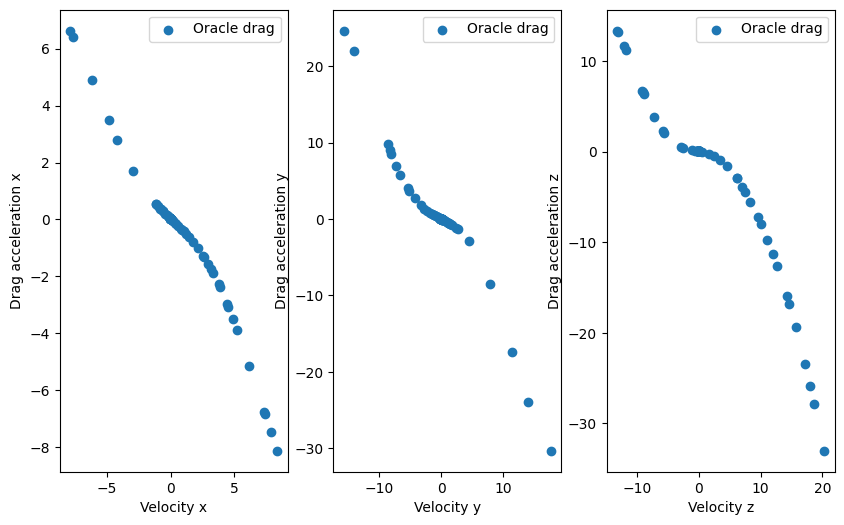

In [3]:




plt.figure(figsize=(10, 6), dpi=100)
plt.subplot(131)
plt.scatter(z[:,7], y_pred[:,0])
plt.xlabel('Velocity x')
plt.ylabel('Drag acceleration x')
plt.legend(('Oracle drag', 'Estimated drag'))

plt.subplot(132)
plt.scatter(z[:,8], y_pred[:,1])
plt.xlabel('Velocity y')
plt.ylabel('Drag acceleration y')
plt.legend(('Oracle drag', 'Estimated drag'))

plt.subplot(133)
plt.scatter(z[:,9], y_pred[:,2])
plt.xlabel('Velocity z')
plt.ylabel('Drag acceleration z')
plt.legend(('Oracle drag', 'Estimated drag'))